# Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [110]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [3]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [6]:
# ваш код здесь
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).  
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

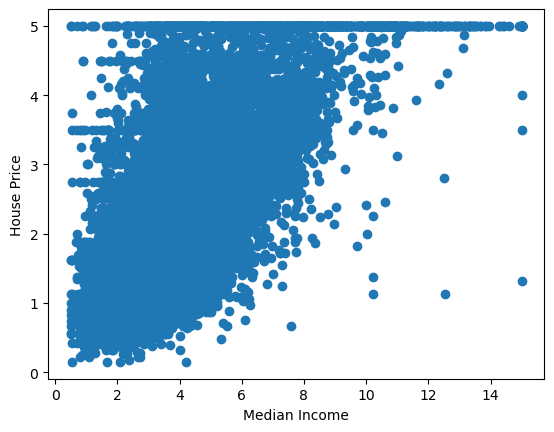

In [7]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.  
Какая это зависимость?

Text(0, 0.5, 'House Price')

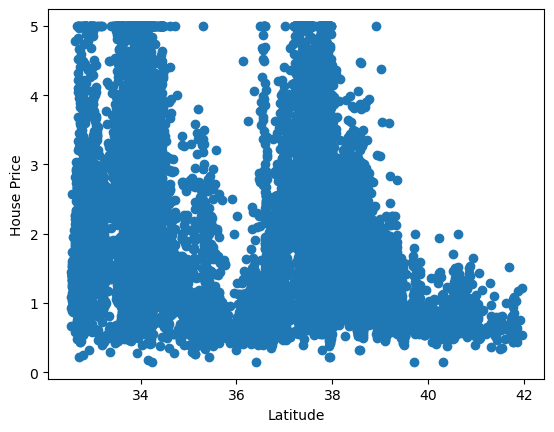

In [9]:
# ваш код здесь
plt.scatter(X['Latitude'], y)
plt.xlabel('Latitude')
plt.ylabel('House Price')

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

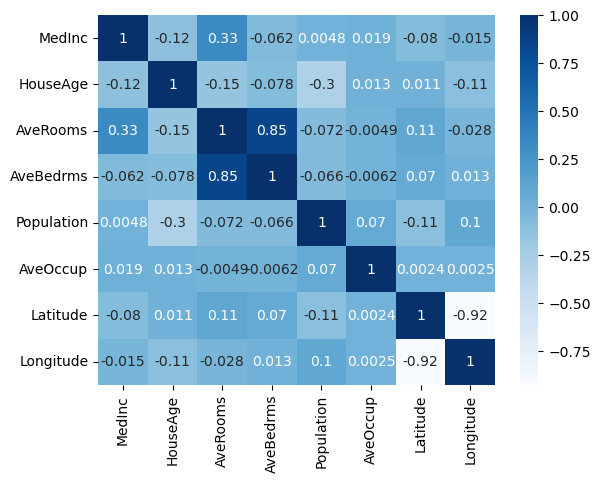

In [10]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.  
Какой признак имеет наибольшую по модулю корреляцию с таргетом?  
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [13]:
X['target'] = y

In [42]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


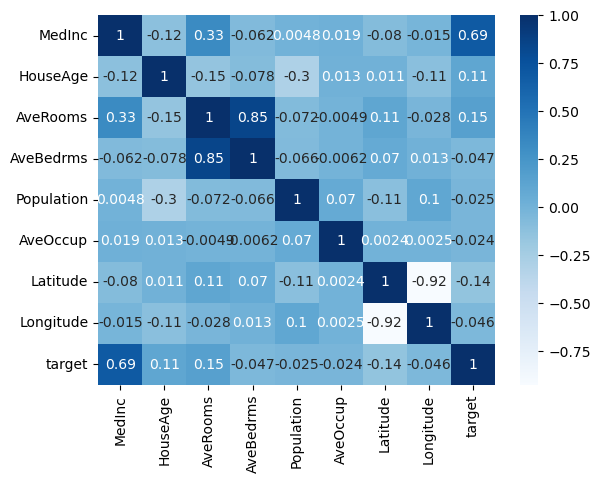

In [15]:

corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [90]:
X.drop('target', axis=1, inplace=True)

In [118]:
from sklearn.model_selection import train_test_split



In [125]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

##Задание 4

Сколько объектов попали в тест?

In [126]:
Xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [127]:
ytest.shape

(5160,)

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [129]:
prediction = model.predict(Xtest)

## Задание 5

In [104]:
import numpy as np

Вычислите значение метрики *MSE* на тестовых данных.  
Ответ округлите до десятых.

In [105]:
np.array(ytest)

array([0.59 , 0.888, 0.7  , ..., 1.534, 1.836, 3.839])

In [130]:
prediction

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [121]:
from sklearn.metrics import mean_squared_error



In [132]:
mse = mean_squared_error(ytest, prediction)
print(mse)
print(round(mse ** 0.5, 2))

0.541128747847068
0.74
